#### CNN on Fashion MNIST Dataset
The Fashion MNIST data set contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

Import necessary libraries

In [10]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# load the data set
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

#### Data Preprocessing
When utilizing a convolutional layer as the initial layer in our model, it is necessary to reshape our data into the format (n_images, x_shape, y_shape, channels). Simply put, if you are working with grayscale images, you should set the value of channels to 1. Conversely, if your input consists of RGB images, the channels should be set to 3.

In [12]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1) # Negative one is the same as specifying the total number of images in the training set

train_X.shape

(60000, 28, 28, 1)

By adjusting the pixel values within the range of 0 to 1, we can enhance the learning rate of our model.

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

To enable our model to handle categorical data, it is necessary to employ one-hot encoding. In one-hot encoding, the digits 0 to 9 are represented by a sequence of nine zeros and a single one. The specific digit is indicated by the position of the number 1. For instance, a 3 would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [14]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#### Training

Our convolutional layers will consist of 64 neurons (also known as feature maps) and utilize a 3x3 feature detector. Additionally, our pooling layers will employ max pooling using a 2x2 matrix. It is common practice for convolutional neural networks to be followed by an artificial neural network. In Keras, a Dense layer performs the operation output = activation(dot(input, weight) + bias). However, since the input to our artificial neural network must be in one dimension, we flatten it beforehand.

In [15]:
# Create a sequential model
model = Sequential()

# Add a 2D convolutional layer with 64 filters of size 3x3, and specify the input shape
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
# Apply the ReLU activation function
model.add(Activation('relu'))
# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters of size 3x3
model.add(Conv2D(64, (3, 3)))
# Apply the ReLU activation function
model.add(Activation('relu'))
# Add another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the input to a 1D vector
model.add(Flatten())

# Add a fully connected layer with 64 neurons
model.add(Dense(64))
# Add another fully connected layer with 10 neurons for the output classes
model.add(Dense(10))
# Apply the softmax activation function to obtain probability distributions
model.add(Activation('softmax'))

# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

The above code creates a convolutional neural network (CNN) model for image classification. It consists of two convolutional layers followed by max pooling, a flattening layer, and two fully connected layers. The activation functions used are ReLU for the convolutional layers and softmax for the output layer. The model is compiled with the categorical cross-entropy loss, Adam optimizer, and accuracy as the evaluation metric.

Utilizing TensorFlow on your GPU can yield significant benefits due to the matrix-based computations involved in convolutional neural networks. However, if you are training the model using a CPU, I would suggest limiting the number of epochs to 10 or less to avoid prolonged training times. It is important to ensure that the batch size matches the number of images being fed into the first convolutional layer for optimal performance.

In [16]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 16s 16ms/step - loss: 0.4631 - accuracy: 0.8352
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3155 - accuracy: 0.8869
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2758 - accuracy: 0.9006
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2476 - accuracy: 0.9100
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2288 - accuracy: 0.9156
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2121 - accuracy: 0.9226
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1963 - accuracy: 0.9276
Epoch 8/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1836 - accuracy: 0.9322
Epoch 9/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1710 - accuracy: 0.9366
Epoch 10/10
938/938 [==============================] - 16s 17ms/step - loss: 0.162

After reaching the tenth epoch, our model achieved an impressive accuracy of 94%, considering all the factors involved. Now, let's evaluate the performance of our model in categorizing new images to further assess its capabilities.

In [21]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.9058
Test loss 0.27877575159072876
Test accuracy 0.9057999849319458


Upon analyzing the test accuracy, it is evident that our model has exhibited slight overfitting. Now, let's examine the first prediction made by our model.

In [18]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 1s 3ms/step
9


The number 9 has a matching class of Ankle boot.
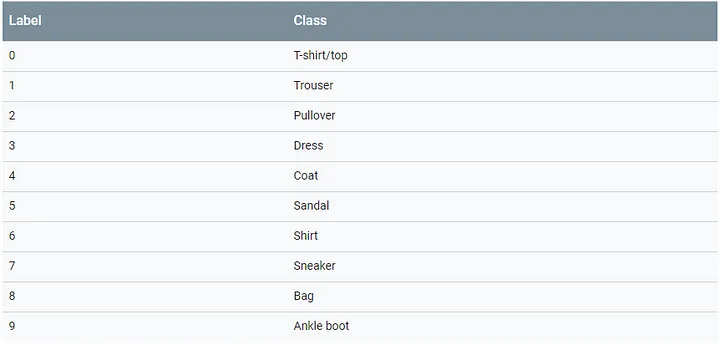

Running the following code will display the first image.

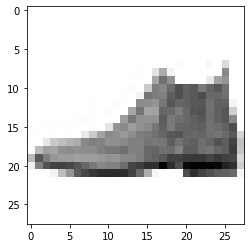

In [19]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Our model correctly classified the first image in our testing data set.